In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from math import e
import numpy as np
%matplotlib inline

In [27]:
data = pd.read_csv('gbm-data.csv')
X = data.drop('Activity', axis=1).values
y = data['Activity'].values


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.8, 
                                   random_state=241)

In [32]:
all_train_loss = []
all_test_loss = []
for i in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=i)
    clf.fit(X_train, y_train)
    test_loss = []
    train_loss = []
    for i,func in enumerate(clf.staged_decision_function(X_train)):
        pred = np.array([(1/(1+e**-x)) for x in func])
        train_loss.append((log_loss(y_train, pred), i))
    for i,func in enumerate(clf.staged_decision_function(X_test)):
        pred = np.array([(1/(1+e**-x)) for x in func])
        test_loss.append((log_loss(y_test, pred), i))
    print(min(train_loss))
    print(min(test_loss))
    all_train_loss.append([x[0] for x in train_loss])
    all_test_loss.append([x[0] for x in test_loss])



      Iter       Train Loss   Remaining Time 
         1           1.0190           36.50s
         2           0.9192           37.97s
         3           0.8272           36.75s
         4           0.7834           33.66s
         5           0.7109           32.34s
         6           0.6368           31.40s
         7           0.5797           30.74s
         8           0.5610           29.58s
         9           0.5185           29.11s
        10           0.4984           28.50s
        20           0.1999           27.39s
        30           0.1313           25.90s
        40           0.0790           23.81s
        50           0.0511           22.68s
        60           0.0352           21.15s
        70           0.0245           19.57s
        80           0.0162           18.11s
        90           0.0114           16.96s
       100           0.0077           15.80s
       200           0.0004            4.82s
(0.00020857611394801392, 180)
(0.58229425942784763, 0)

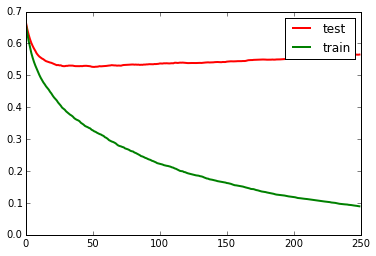

In [37]:
plt.figure()
plt.plot(all_test_loss[4], 'r', linewidth=2)
plt.plot(all_train_loss[4], 'g', linewidth=2)
plt.legend(['test', 'train'])

In [42]:
from sklearn.ensemble import RandomForestClassifier as RF

In [43]:
clf = RF(n_estimators=36, random_state=241)

In [44]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [45]:
pred = clf.predict_proba(X_test)
log_loss(y_test, pred)

0.54138128618040693